In [1]:
import torch
from torch import nn
import numpy as np
import sklearn
from sklearn.datasets import make_circles, make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import requests
from pathlib import Path
from timeit import default_timer as timer
from tqdm.auto import tqdm


## 0. Computer vision libraries in PyTorch
* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problem
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

## 1. Getting a dataset
The dataset we will be using is FashionMNIST.

In [2]:
# Set up training data
train_data = datasets.FashionMNIST(
    root='data', # Where to download data to
    train=True, # Do we want the training dataset
    download=True, # Do we want to download it
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root='data', # Where to download data to
    train=False, # Do we want the training dataset
    download=True, # Do we want to download it
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data
    target_transform=None # How do we want to transform the labels/targets
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14097330.26it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 295062.35it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4959661.22it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7311980.02it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
# See the first training example
image, label = train_data[0]
image[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Check input and output shapes of the data

In [6]:
# Check the shape
image.shape, label
# Image shape -> [Color Channels, Height, Width]

(torch.Size([1, 28, 28]), 9)

### 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

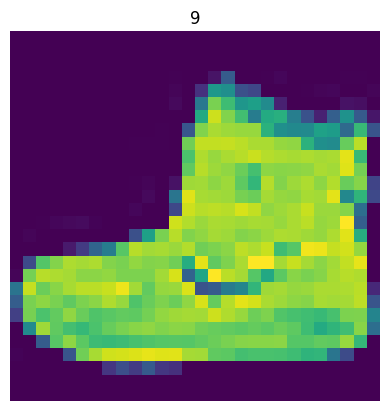

In [7]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

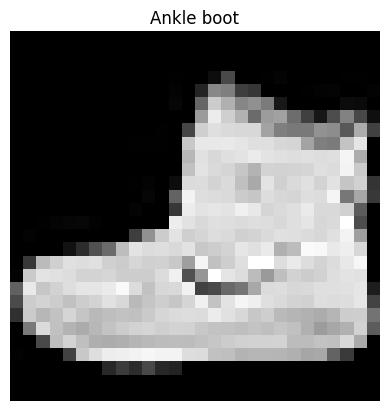

In [8]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

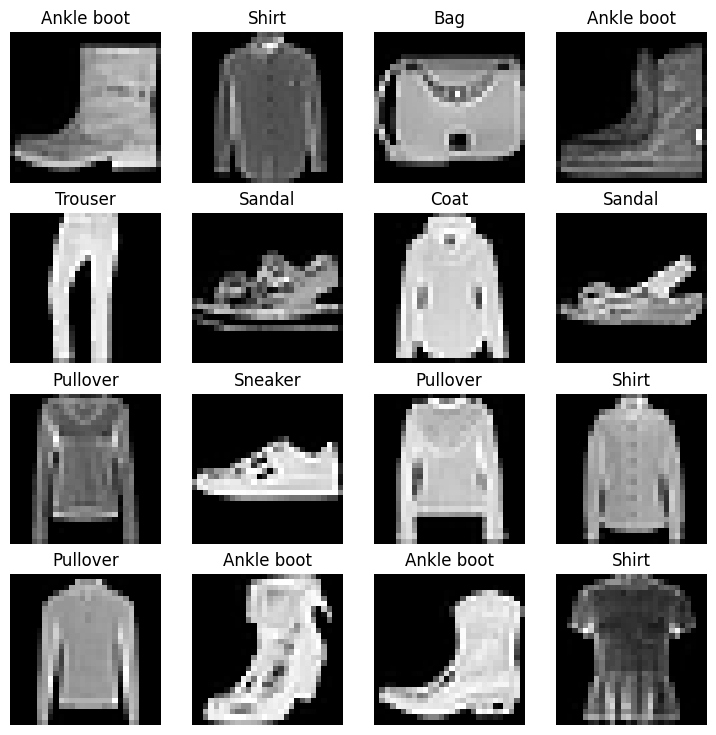

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1,rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare Dataloader

Right now, our data is in the form of PyTorch Datasets

Dataloader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches/mini-batches

Why do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look at (store in memory) 60000 images in one hit. So we reak itdown to 32 images at a time (Batch size of 32)
2. it gives our neural network more chances to update its gradients per epoch.

In [10]:
# Set up the batch size hyperparameter
BATCH_SIZE = 32
torch.manual_seed(42)

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f4ccbdbcee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f4ccbd9f1f0>)

In [11]:
# Check out what we created
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [12]:
# Check out what is inside th training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape, type(train_labels_batch)

(torch.Size([32, 1, 28, 28]), torch.Size([32]), torch.Tensor)

torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

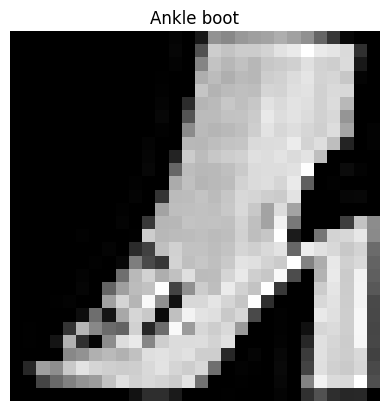

In [13]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
print(img.shape)
plt.imshow(img.squeeze(), cmap='gray') # The purpose of squeezing is to get rid of the first '1' dimension because plt use color channels last
plt.title(class_names[label])
plt.axis('off')

## 3. Model 0: build a baseline model
When starting to build a series of machine learning models it is best practice to start with a baseline model

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten(start_dim=1)

# Get a single sample
x = train_features_batch[0]
# type(train_features_batch), train_features_batch.shape,len(train_features_batch),type(train_dataloader),len(train_dataloader)
output = flatten_model(x) # Perform the forward pass

print(f'shape before flattening: {x.shape}, after flattening: {output.shape}')


shape before flattening: torch.Size([1, 28, 28]), after flattening: torch.Size([1, 784])


In [15]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [16]:
torch.manual_seed(42)

# Set up model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names) # One for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 set up loss, optimizer and evaluation metrics

* Loss function - since it is multi class. Our loss function is going to be `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()`
* Evaluation metric- since we are working on a classificaiton problem, Use accuracy as evaluation metric

In [18]:
# Download helper_functions from Learn PyTorch repo
if Path('helper_functions.py').is_file():
    print('Helper functions already exists.')
else:
    print('Downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

In [19]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Set up loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is experimental

Two main things you often want to keep track are:
1. Model's performance (loss and accuracy)
2. How fast it runs

In [20]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device = None):
    """Prints difference between start and time"""
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what is happening
5. Time it

**Note:** The optimizer updates the parameters every batch, NOT every epoch.

In [21]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# Set the seedand start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we will keep this small for now for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-----')

    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X,y), in enumerate(train_dataloader):
        model_0.train()

        # 1. forward pass
        y_pred = model_0(X)

        # 2. calculate the loss (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss


        # 3.
        optimizer.zero_grad()

        # 4.
        loss.backward()

        # 5.
        optimizer.step() # Update parameters once per batch, NOT once per epoch

        # Print our what is happening:
        if batch % 400 == 0:
            print(f'Batch number: {batch}/{len(train_dataloader)}. ')
    # Devide total train loss by lenth of train dataloader
    train_loss /= len(train_dataloader) # This gives you the average loss per epoch

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. forward pass
            test_pred = model_0(X_test)

            # 2. calculate the loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate the accuracy
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))
        # Calculate test_loss (average loss per batch)
        test_loss /= len(test_dataloader)

        # calculate avg test acc
        test_acc /= len(test_dataloader)
    print(f'\nTrain loss: {train_loss:4f}|Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Batch number: 0/1875. 
Batch number: 400/1875. 
Batch number: 800/1875. 
Batch number: 1200/1875. 
Batch number: 1600/1875. 

Train loss: 0.590389|Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
-----
Batch number: 0/1875. 
Batch number: 400/1875. 
Batch number: 800/1875. 
Batch number: 1200/1875. 
Batch number: 1600/1875. 

Train loss: 0.476332|Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
-----
Batch number: 0/1875. 
Batch number: 400/1875. 
Batch number: 800/1875. 
Batch number: 1200/1875. 
Batch number: 1600/1875. 

Train loss: 0.455033|Test loss: 0.4766 | Test acc: 83.4265
Train time on cpu: 52.577 seconds


## 4. Make predictions and get model 0 results

In [22]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    '''returns a dictionary containing the results of model predicting on the data loader'''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            # Device Agnostic code
            X,y = X.to(device), y.to(device)
            model=model.to(device)
            # Make predicitons
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the average value per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {'model_name': model.__class__.__name__, # This only works if the model is created with a class
            'model_loss': loss.item(),
            'model_acc': acc}
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Set up device agnostic code (for a GPU if there is one)

In [23]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [24]:
# Set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## 6. Building a model with non-linearity

In [25]:
# Create a model with non-linear and linear layers

In [26]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #Flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)


In [27]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.1 set up loss, optimizer andevaluation metrics

In [28]:
# Create a loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionize training/testing loop

In [29]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    train_loss, train_acc = 0, 0
    # Put model to training mode
    model.train()

    ### Training
    # Add a loop to loop through the training batches
    for batch, (X,y), in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calculate the loss (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits to prediction labels

        # 3.
        optimizer.zero_grad()

        # 4.
        loss.backward()

        # 5.
        optimizer.step() # Update parameters once per batch, NOT once per epoch


    # Devide total train loss by lenth of train dataloader
    train_loss /= len(data_loader) # This gives you the average loss per epoch
    train_acc /= len(data_loader)

    print(f'Train loss: {train_loss:.5f}|Train_acc: {train_acc:.2f}')




In [30]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
    test_loss, test_acc = 0, 0

    # Put model into eval mode
    model.eval()
    # Turn on inference mode
    with torch.inference_mode():
        for X,y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)

            # 1. forward
            test_pred = model(X)

            # 2 calculate the loss and acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))

        # adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'test loss: {test_loss:.5f} | test acc: {test_acc:.2f}\n')


In [31]:
torch.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

# Set epoch
epochs = 3

# Create optimization and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n---------')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199|Train_acc: 61.34
test loss: 0.95636 | test acc: 65.00

Epoch: 1
---------
Train loss: 0.78101|Train_acc: 71.93
test loss: 0.72227 | test acc: 73.91

Epoch: 2
---------
Train loss: 0.67027|Train_acc: 75.94
test loss: 0.68500 | test acc: 75.02

Train time on cpu: 42.015 seconds


In [32]:
# Get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## 7. Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets
CNN's are known for their capabilities to find patterns in visual data

In [45]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [46]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [47]:
image.shape
model_2(image.to(device).unsqueeze(0))


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

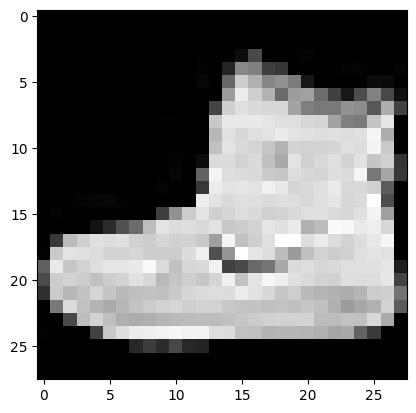

In [48]:
plt.imshow(image.squeeze(), cmap='gray')

In [49]:
model_2(image.to(device).unsqueeze(0))


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through nn.Conv2d()

In [50]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [51]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3), # here 3 is equivalent of (3,3)
                       stride=1,
                       padding=0)
conv_output = conv_layer(test_image)
test_image.shape,conv_output.shape,

(torch.Size([3, 64, 64]), torch.Size([10, 62, 62]))

### 7.2 Stepping into `nn.MaxPool2d()`

In [52]:
print(f'test image original shape: {test_image.shape}')

# Create a MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_iamge_through_conv = conv_layer(test_image)
print(f'shape after going through conv_layer(): {test_iamge_through_conv.shape}')

# Pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_iamge_through_conv)
print(f'shape after goign through both layer: {test_image_through_conv_and_max_pool.shape}')


test image original shape: torch.Size([3, 64, 64])
shape after going through conv_layer(): torch.Size([10, 62, 62])
shape after goign through both layer: torch.Size([10, 31, 31])


In [53]:
torch.manual_seed(42)
# Create a random tensor with similar shape
random_tensor = torch.rand(size=(1,2,2))

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

max_pool_tensor.shape,random_tensor, max_pool_tensor



(torch.Size([1, 1, 1]),
 tensor([[[0.8823, 0.9150],
          [0.3829, 0.9593]]]),
 tensor([[[0.9593]]]))

### 7.3 Set up a loss function and optimizer


In [54]:
# loss_fn/eval metric/optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model_2

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.59518|Train_acc: 78.38
test loss: 0.39500 | test acc: 85.99

Epoch: 1
Train loss: 0.36536|Train_acc: 86.90
test loss: 0.35244 | test acc: 86.91

Epoch: 2
Train loss: 0.32588|Train_acc: 88.13
test loss: 0.32719 | test acc: 88.07

Train time on cpu: 209.596 seconds


In [56]:
# Get model_2. results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [57]:
model_2_results, model_0_results

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499})

## 8 Compare model results and training time

In [58]:
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [59]:
# Add training time to result comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2,]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,52.576725
1,FashionMNISTModelV1,0.685001,75.019968,42.015068
2,FashionMNISTModelV2,0.327190,88.069089,209.595580


Text(0, 0.5, 'model')

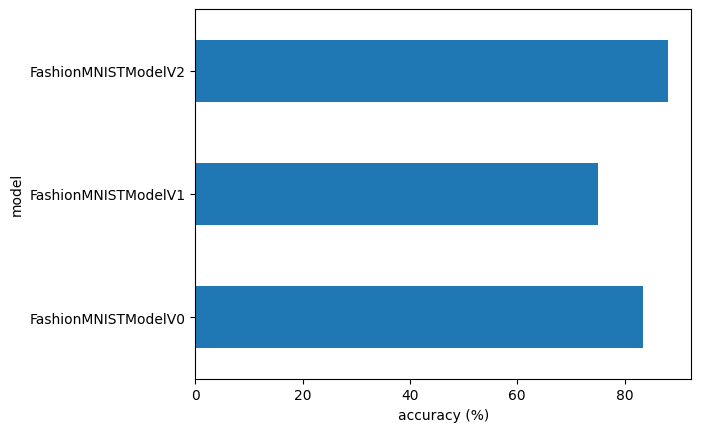

In [60]:
# Visualize the model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model


In [61]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logit = model(sample)

            # logit -> probs
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [62]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

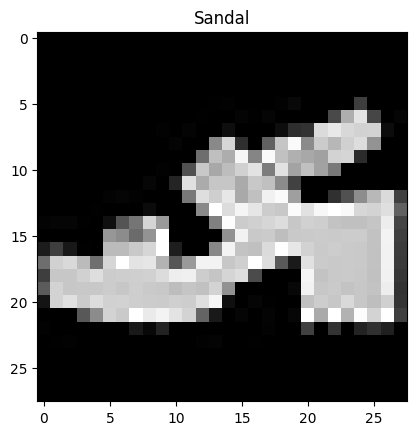

In [63]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [73]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[0],type(pred_probs)

(tensor([1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04]),
 torch.Tensor)

In [65]:
# Convert pred probs into labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [66]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

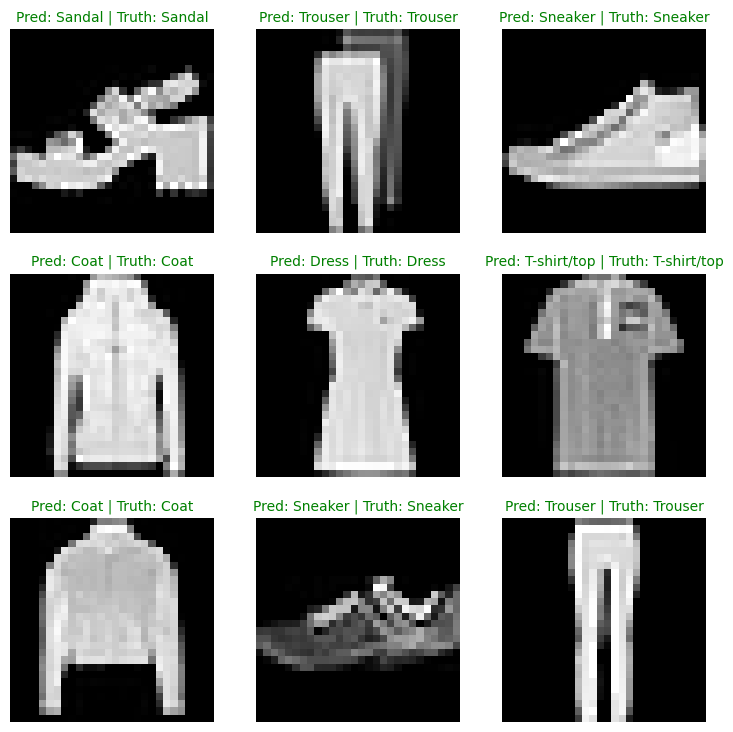

In [67]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):
    # Create subplots
    plt.subplot(nrows, ncols, i + 1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')

    # Find the prediction (in text form)
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a titlefor the plot
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') # Green text if the prediction same as truth
    else:
        plt.title(title_text, fontsize=10, c='r') # Red text if the prediction different as truth
    plt.axis(False)



## 10. Making a confusion matrix for further prediction evaluation
A fantastic way to evaluate your classification models VISUALLY

1. Make predictions with our trained model on the test dataset
2. make a confusion matrix `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

In [76]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)
        # forward pass
        y_logit = model_2(X)
        # logits -> pred prob  -> pred labels
        y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
        # Put predictions to cpu for evaluation
        y_preds.append(y_pred.cpu())

print(type(y_preds))
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

<class 'list'>


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [75]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [86]:
try:
    import torchmetrics
except:
    !pip install -q torchmetrics
    import torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 4.7 MB/s eta 0:00:00


In [88]:
torchmetrics.__version__

'1.2.1'

In [90]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [107]:
# 2. Set up confusion instance and cmopare prediction to the targets
conf_mat = ConfusionMatrix(num_classes=len(class_names),task='MULTICLASS')
conf_mat_tensor = conf_mat(preds=y_pred_tensor,
                           target=test_data.targets)

In [102]:
conf_mat_tensor

tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

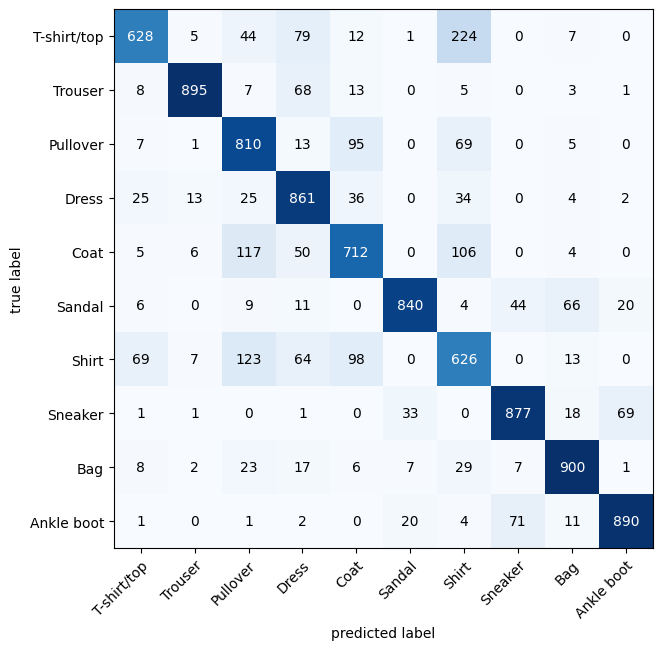

In [108]:
# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = conf_mat_tensor.numpy(), # MatPlotLib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [110]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = '3_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/3_pytorch_computer_vision_model_2.pth


In [112]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10) # Make sure the shapes are the same
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [113]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [114]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [115]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [119]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-2)

tensor(True)